<h2><center>Stock Simulation</center></h2>

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# 10 year * 52 weeks * 50 stocks = 520 weekly data * 50 

### Firstly, generate stock using geometric brownian motion

In [4]:
# num of stocks
N = 50

### Set the mean return to be 12.5%

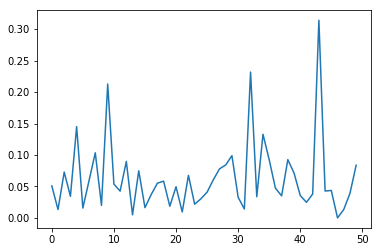

In [5]:
a= 0.125 * np.random.exponential(scale =0.5, size = N)
plt.plot(a,'-')
plt.show()

### Pick a good mu and a good covariance

In [6]:
mu = 0.125 * np.random.exponential(scale =0.5, size = N)
# mu = 0.25  * np.random.random(N)
#print(mu)
cov = 0.005 * np.random.random(N*N).reshape((N,N))
cov[np.diag_indices_from(cov)] = 0.2 * np.random.random(N)
#print(cov)

In [7]:
price = 30 * np.random.random(520 * N).reshape((520, N))
dt = 1/52
for i in range(1, 520):
    prev_price = price[i-1, :]
    dw_t = np.random.normal(0, np.sqrt(dt), N)
    price[i, :] = prev_price + np.multiply(prev_price, mu * dt + np.dot(cov.T, dw_t))

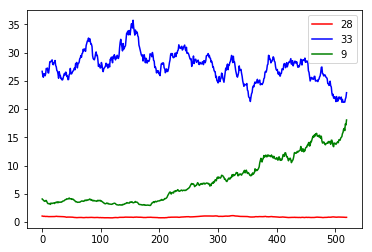

In [8]:
a = np.random.randint(N)
b = np.random.randint(N)
c = np.random.randint(N)
plt.plot(price[:, a], '-r', label = a)
plt.legend()
plt.plot(price[:, b], '-b', label = b)
plt.legend()
plt.plot(price[:, c], '-g', label = c)
plt.legend()
plt.show()

### Export to csv

In [265]:
output_path = './data_simulated/GBM/'
for i in range(N):
    df = pd.DataFrame()
    df['Date'] = range(1, 521)
    df['Price'] = price[:, i]
    df.to_csv(output_path+"GBM"+str(i+1)+".csv", header=['Date', 'Price'], index=False)

### Secondly, we try CEV process using alpha>0

In [9]:
alpha = 1

In [10]:
price = 30 * np.random.random(520 * N).reshape((520, N))
dt = 1/52
for i in range(1, 520):
    prev_price = price[i-1, :]
    dw_t = np.random.normal(0, np.sqrt(dt), N)
    price[i, :] = prev_price + np.multiply(prev_price, mu * dt + prev_price**(alpha / 2) * np.dot(cov.T, dw_t))

### Randomly plot some stocks

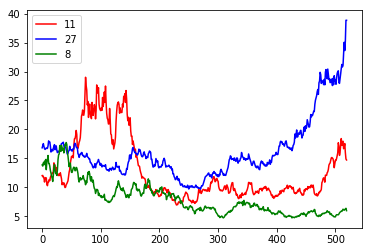

In [13]:
a = np.random.randint(N)
b = np.random.randint(N)
c = np.random.randint(N)
plt.plot(price[:, a], '-r', label = a)
plt.legend()
plt.plot(price[:, b], '-b', label = b)
plt.legend()
plt.plot(price[:, c], '-g', label = c)
plt.legend()
plt.show()

### Export to csv

In [21]:
output_path = './data_simulated/CEV/'
for i in range(N):
    df = pd.DataFrame()
    df['Date'] = range(1, 521)
    df['Price'] = price[:, i]
    df.to_csv(output_path+"CEV"+str(i+1)+".csv", header=['Date', 'Price'], index=False)